# **Load the CSV file**





In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/BTC-USD.csv")

# Display the first few rows of the dataset
print(df.head())

# Display basic information about the dataset
print(df.info())

# Display summary statistics of the dataset
print(df.describe())

         Date        Open        High         Low       Close   Adj Close  \
0  2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
1  2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2  2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
3  2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
4  2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

     Volume  
0  21056800  
1  34483200  
2  37919700  
3  36863600  
4  26580100  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3512 entries, 0 to 3511
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3512 non-null   object 
 1   Open       3512 non-null   float64
 2   High       3512 non-null   float64
 3   Low        3512 non-null   float64
 4   Close      3512 non-null   float64
 5   Adj Close  3512 non-null   float64
 6   Volume     3512 non-nu

# **Drop the Adjecent Close column**

In [99]:
#df.drop(columns=['Adj Close'], inplace=True)
#inplace=True implies that no new dat is created and changed in existing dataframe
df=df.drop(columns=['Adj Close'])
print(df.head())

         Date        Open        High         Low       Close    Volume
0  2014-09-17  465.864014  468.174011  452.421997  457.334015  21056800
1  2014-09-18  456.859985  456.859985  413.104004  424.440002  34483200
2  2014-09-19  424.102997  427.834991  384.532013  394.795990  37919700
3  2014-09-20  394.673004  423.295990  389.882996  408.903992  36863600
4  2014-09-21  408.084991  412.425995  393.181000  398.821014  26580100


# **Re-order the columns**

In [100]:
columns_order = ['Date','Open','Low','High','Volume','Close']
df=df[columns_order]
print(df.head())

         Date        Open         Low        High    Volume       Close
0  2014-09-17  465.864014  452.421997  468.174011  21056800  457.334015
1  2014-09-18  456.859985  413.104004  456.859985  34483200  424.440002
2  2014-09-19  424.102997  384.532013  427.834991  37919700  394.795990
3  2014-09-20  394.673004  389.882996  423.295990  36863600  408.903992
4  2014-09-21  408.084991  393.181000  412.425995  26580100  398.821014


# **Visualization the data that we processed**

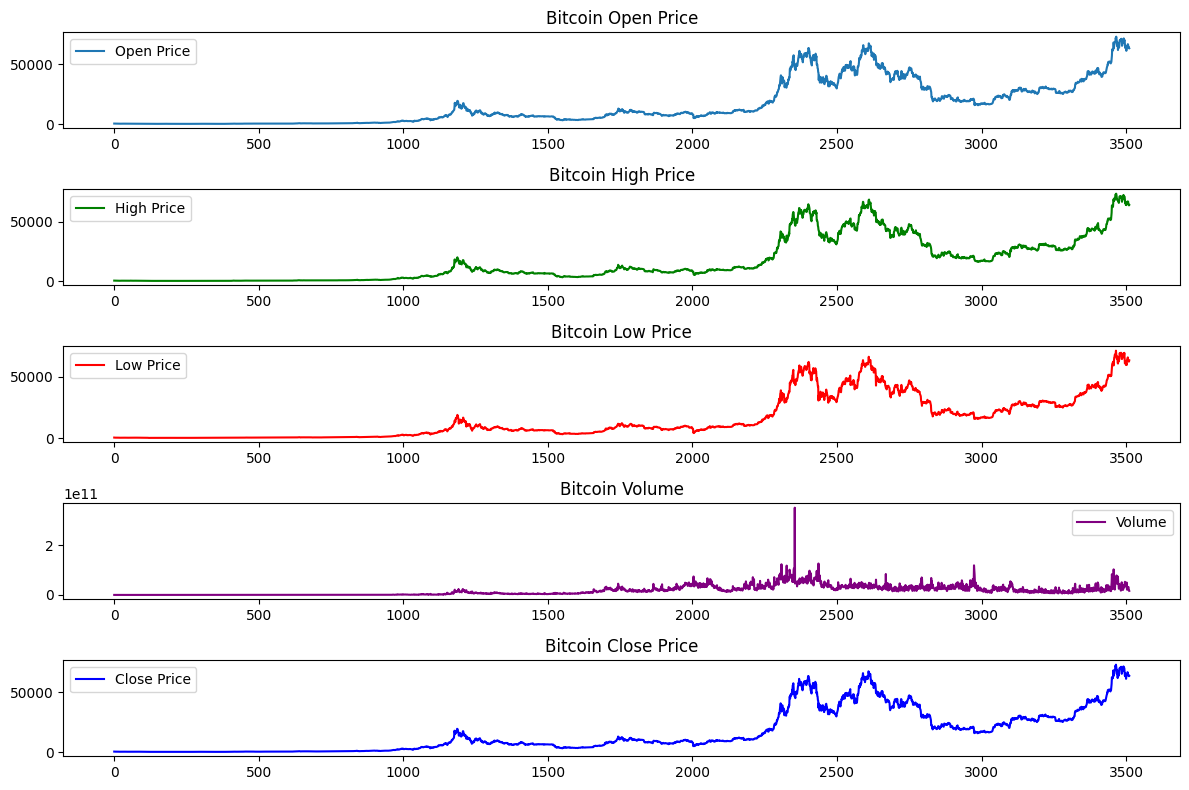

In [101]:
# Plotting the data
plt.figure(figsize=(12, 8))

# Subplot for 'Open' prices
plt.subplot(511)
plt.plot(df['Open'], label='Open Price')
plt.title('Bitcoin Open Price')
plt.legend()

# Adjust the space
plt.subplots_adjust(hspace=1)

# Subplot for 'High' prices
plt.subplot(512)
plt.plot(df['High'], label='High Price', color='green')
plt.title('Bitcoin High Price')
plt.legend()

# Adjust the space
plt.subplots_adjust(hspace=1)

# Subplot for 'Low' prices
plt.subplot(513)
plt.plot(df['Low'], label='Low Price', color='red')
plt.title('Bitcoin Low Price')
plt.legend()

# Adjust the space
plt.subplots_adjust(hspace=1)

# Subplot for 'Close' prices
plt.subplot(514)
plt.plot(df['Volume'], label='Volume', color='purple')
plt.title('Bitcoin Volume')
plt.legend()

# Adjust the space
plt.subplots_adjust(hspace=1)

# Subplot for 'Volume'
plt.subplot(515)
plt.plot(df['Close'], label='Close Price', color='blue')
plt.title('Bitcoin Close Price')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

# **Splitting the data into training and testing data**

In [102]:
from sklearn.model_selection import train_test_split
x = df[['Open','Low','High','Volume']]
y= df[['Close']]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)


print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)


# Convert y_train and y_test to numpy arrays
y_train = y_train.values.ravel() if isinstance(y_train, pd.DataFrame) else y_train.ravel()
y_test = y_test.values.ravel() if isinstance(y_test, pd.DataFrame) else y_test.ravel()

x_train shape:  (2809, 4)
x_test shape:  (703, 4)
y_train shape:  (2809, 1)
y_test shape:  (703, 1)


In [103]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from scipy.stats import uniform, randint

# Define the pipeline with scaling and SVR
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('svr', SVR())
])

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'svr__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'svr__C': uniform(0.1, 1000),  # C can be between 0.1 and 1000
    'svr__epsilon': uniform(0.01, 1),  # epsilon can be between 0.01 and 1
    'svr__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10]
}
# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=50, cv=10,
                                   scoring='neg_mean_squared_error', n_jobs=-1)
random_search.fit(x_train, y_train)

# Get the best parameters
best_params = random_search.best_params_


print("Best Hyperparameters: ", best_params)

Best Hyperparameters:  {'svr__C': 794.2010399594411, 'svr__epsilon': 0.9703548730217635, 'svr__gamma': 0.1, 'svr__kernel': 'linear'}


# **Train the model with the best parameters**

In [104]:
best_svr_model = SVR(**{key.split('__')[1]: value for key, value in best_params.items()})
best_svr_model.fit(MinMaxScaler().fit_transform(x_train), y_train)

# Make prediction on the test set
predictions = best_svr_model.predict(MinMaxScaler().fit_transform(x_test))




# **Evaluate the model**

In [105]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)


print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("R-squared (R²): ", r2)



Mean Squared Error:  502076.35293763806
Mean Absolute Error:  397.0459845228307
R-squared (R²):  0.9984600117531989
